In [6]:
#from memory_profiler import profile
import yt
from yt.units import pc, kpc, second, Kelvin, gram, erg, cm

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import numpy as np

%matplotlib inline

In [7]:
# Define some constant parameters to be used.
mp      = 1.6726e-24  * gram # g
mH      = 1.6733e-24  * gram
mC      = 12.011*mH
mO      = 15.999*mH
#mu      = 1.2924
kb      = 1.3806e-16  *erg / Kelvin # erg K-1
GNewton = 6.6743e-8   * cm**3 / (gram * second**2 )# cm3 g-1 s-2
Msun    = 1.9884e33   * gram
#mm      = mu*mp

ppc = 3.0856776e18

# -------------------------------------------------------------
#              Create a lot of new derived fields
# -------------------------------------------------------------

# -------------------------------------------------------------
#              Create a lot of new derived fields
# -------------------------------------------------------------

# Create a derived field.
# Hydrogen number density
def numdensH(field, data): 
    nH = data["dens"]*(data["ihp "]+data["iha "]+data["ih2 "])/(1.4*mH)
    return nH

# Molecular Hydrogen number density
def numdensH2(field, data): 
    nH2 = data["dens"]*(data["ih2 "])/(1.4*mH)
    return nH2

# Carbon number density
def numdensC(field, data): 
    nC = data["dens"]*(data["icp "]+data["ico "])/(1.4*mC)
    return nC

# electron number density
def numdense(field, data): 
    ne = data["dens"]*(data["ihp "]/(1.4*mH) + data["icp "]/(1.4*mC))
    return ne

def numdens_tot(field, data): 
    nH = data["dens"]*(data["ihp "]+data["iha "]+data["ih2 "])/(1.4*mH)
    nC = data["dens"]*(data["icp "]+data["ico "])/(1.4*mC)
    nO = data["dens"]*(data["io  "]+data["iohx"])/(1.4*mO)
    return nH + nC + nO

# Ionized hydrogen fraction
def xHp(field, data): 
    nH  = data["dens"]*(data["ihp "]+data["iha "]+data["ih2 "])/(1.4*mH)
    xHp = data["dens"]*data["ihp "]/(1.4*mH)
    xHp = xHp / nH
    return xHp

# Molecular hydrogen fraction
def xH2(field, data): 
    nH  = data["dens"]*(data["ihp "]+data["iha "]+data["ih2 "])/(1.4*mH)
    xH2 = data["dens"]*data["ih2 "]/(1.4*mH)
    xH2 = xH2 / nH
    return xH2

# Ionized carbon fraction
def xCp(field, data): 
    nC  = data["dens"]*(data["icp "]+data["ico "])/(1.4*mC)
    xCp = data["dens"]*data["icp "]/(1.4*mC) / nC
    return xCp

# electron fraction
def xe(field, data): 
    nH = data["dens"]*(data["ihp "]+data["iha "]+data["ih2 "])/(1.4*mH)
    nC = data["dens"]*(data["icp "]+data["ico "])/(1.4*mC)
    ne = data["dens"]*(data["ihp "]/(1.4*mH) + data["icp "]/(1.4*mC))
    xe = ne / (nH + nC)
    return xe

# electron fraction
#def GG(field, data): 
#    G = fz.get_G(data["cdto"], 1.68)
#    return G


yt.add_field('nH', function=numdensH,  units="1/cm**3", force_override=True)
yt.add_field('nH2',function=numdensH2, units="1/cm**3", force_override=True)
yt.add_field('nC', function=numdensC,  units="1/cm**3", force_override=True)
yt.add_field('ne', function=numdense,  units="1/cm**3", force_override=True)
yt.add_field('ntot',function=numdens_tot,  units="1/cm**3", force_override=True)
yt.add_field('xHp', function=xHp,      units="dimensionless", force_override=True)
yt.add_field('xH2', function=xH2,      units="dimensionless", force_override=True)
yt.add_field('xCp', function=xCp,      units="dimensionless", force_override=True)
yt.add_field('xe', function=xe,        units="dimensionless", force_override=True)
#yt.add_field('G',  function=GG,        units="dimensionless", force_override=True)

In [8]:
# Input variables.
data_dir   = "/home/jcibanezm/codes/run/Silcc/CF_Prabesh"
filename   = data_dir + "/NL99_R8_cf_hdf5_chk_0028"

pf = yt.load("%s"%(filename))

yt : [INFO     ] 2018-10-01 16:34:07,666 Particle file found: NL99_R8_cf_hdf5_chk_0028
yt : [INFO     ] 2018-10-01 16:34:07,677 integer runtime parameter checkpointfilenumber overwrites a simulation scalar of the same name
yt : [INFO     ] 2018-10-01 16:34:07,678 integer runtime parameter forcedplotfilenumber overwrites a simulation scalar of the same name
yt : [INFO     ] 2018-10-01 16:34:07,680 integer runtime parameter nbegin overwrites a simulation scalar of the same name
yt : [INFO     ] 2018-10-01 16:34:07,680 integer runtime parameter plotfilenumber overwrites a simulation scalar of the same name
yt : [INFO     ] 2018-10-01 16:34:07,691 Parameters: current_time              = 568049127341766.1
yt : [INFO     ] 2018-10-01 16:34:07,691 Parameters: domain_dimensions         = [32  8  8]
yt : [INFO     ] 2018-10-01 16:34:07,692 Parameters: domain_left_edge          = [-1.974784e+20 -4.936960e+19 -4.936960e+19]
yt : [INFO     ] 2018-10-01 16:34:07,693 Parameters: domain_right_edge   

In [9]:
data = pf.all_data()

In [10]:
print(data["nH"][0])
print(data["ntot"][0])

0.5138985733329287 cm**(-3)
0.514133092314124 cm**(-3)


In [11]:
pf.derived_field_list

[('flash', u'accx'),
 ('flash', u'accy'),
 ('flash', u'accz'),
 ('flash', u'acei'),
 ('flash', u'cdco'),
 ('flash', u'cdh2'),
 ('flash', u'cdto'),
 ('flash', 'cell_volume'),
 ('flash', u'chid'),
 ('flash', u'dens'),
 ('flash', u'divb'),
 ('flash', 'dx'),
 ('flash', 'dy'),
 ('flash', 'dz'),
 ('flash', u'eint'),
 ('flash', u'ener'),
 ('flash', u'gamc'),
 ('flash', u'game'),
 ('flash', u'gpol'),
 ('flash', u'gpot'),
 ('flash', u'ic  '),
 ('flash', u'ichx'),
 ('flash', u'ico '),
 ('flash', u'icp '),
 ('flash', u'ih2 '),
 ('flash', u'iha '),
 ('flash', u'ihco'),
 ('flash', u'ihe '),
 ('flash', u'ihep'),
 ('flash', u'ihp '),
 ('flash', u'im  '),
 ('flash', u'imp '),
 ('flash', u'io  '),
 ('flash', u'iohx'),
 ('flash', u'magp'),
 ('flash', u'magx'),
 ('flash', u'magy'),
 ('flash', u'magz'),
 ('flash', 'path_element_x'),
 ('flash', 'path_element_y'),
 ('flash', 'path_element_z'),
 ('flash', u'pres'),
 ('flash', u'radc'),
 ('flash', u'tdus'),
 ('flash', u'temp'),
 ('flash', u'velx'),
 ('flash',

In [12]:
#yt.ProjectionPlot(pf, 'x', 'nH', data_source=box, )

In [13]:
c  = [0,0,0]
le = [-4.93696000e+19, -4.93696000e+19, -4.93696000e+19]
re = [ 4.93696000e+19,  4.93696000e+19,  4.93696000e+19]

rad = 32

box = pf.box(le, re)

yt : [INFO     ] 2018-10-01 16:34:53,329 Projection completed
yt : [INFO     ] 2018-10-01 16:34:53,330 Making a fixed resolution buffer of (nH) 1024 by 1024
yt : [INFO     ] 2018-10-01 16:34:55,059 Projection completed
yt : [INFO     ] 2018-10-01 16:34:55,060 Making a fixed resolution buffer of (nH) 1024 by 1024


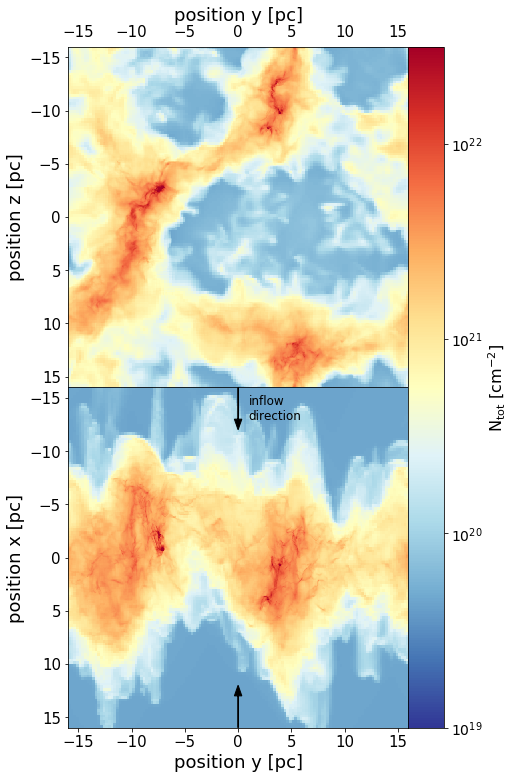

In [16]:
window_frac = 1.0

vmin = 19
vmax = 22.5

res  = 1024
cmap = 'RdYlBu_r'
#cmap = 'jet'

fig = plt.figure(figsize=(7,11))

ax = fig.add_axes([0.035, 0.50, 0.86, 0.43])

los     = 'x'
#extentz  = [le[1]/ppc + rad*(1.-window_frac), re[1]/ppc - rad*(1.-window_frac), le[0]/ppc + rad*(1.-window_frac), re[0]/ppc- rad*(1.-window_frac)]
extentx = [le[0]/ppc, re[0]/ppc, le[1]/ppc, re[1]/ppc]
prj     = pf.proj("nH", los, center=c, data_source=box)
frb_x = prj.to_frb(rad*pc, res)["nH"].value

cax = ax.imshow(np.log10(frb_x), cmap=cmap, extent=extentx, vmin=vmin, vmax=vmax)
#ax.invert_yaxis()

ax.set_xlim(extentx[0], extentx[1])
ax.set_ylim(extentx[3], extentx[2])

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15) 

#start, end = ax.get_xlim()
#ax.xaxis.set_ticks(np.arange(start, end, 20))

#ax.xaxis.tick_top()

ax.xaxis.set_tick_params(labeltop='on', labelbottom='off', labelsize=15)
    
ax.xaxis.set_label_position('top')

ax.set_xlabel("position y [pc]", fontsize=18)
ax.set_ylabel("position z [pc]", fontsize=18)

################
los     = 'z'
extentx = [le[0]/ppc, re[0]/ppc, le[1]/ppc, re[1]/ppc]
prj     = pf.proj("nH", los, center=c, data_source=box)
frb_x = prj.to_frb(rad*pc, res)["nH"].value

ax1 = fig.add_axes([0.035, 0.07, 0.86, 0.43])
cax = ax1.imshow(np.rot90(np.log10(frb_x), k=1), cmap=cmap, extent=extentx, vmin=vmin, vmax=vmax)

ax1.arrow(0, 16, 0, -3, head_width=0.7, head_length=1, color='k')
ax1.arrow(0, -16, 0, 3, head_width=0.7, head_length=1, color='k')
ax1.text(1, -13, "inflow\ndirection", fontsize=12)

for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(15) 

ax1.set_xlabel("position y [pc]", fontsize=18)
ax1.set_ylabel("position x [pc]", fontsize=18)

ax1.set_xlim(extentx[0], extentx[1])
ax1.set_ylim(extentx[3], extentx[2])

cbar_ax = fig.add_axes([0.803, 0.07, 0.07, 0.86])
cbar = fig.colorbar(cax, cax=cbar_ax)

cbar.set_label("N$_{\\mathrm{tot}}$ [cm$^{-2}$]", fontsize=16)

cbar.set_ticks([19, 20, 21, 22, 23])
cbar.set_ticklabels(["10$^{19}$", "10$^{20}$", "10$^{21}$", "10$^{22}$", "10$^{23}$"])

cbar.ax.tick_params(labelsize=14) 

fig.show()

fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/ChargeDist_Dust/Figures/Figure_1_CF_projection.pdf", format='pdf', dpi=200)